# Author Identification
#### Carl Moser, Matthew Beaudouin-Lafon

We did stuff to do things with doodas.

In [1]:
from thinkbayes2 import Suite
from pickle import load
import thinkplot

def getPickle(fileName):
    """
    Unpacks pickled into Markov Chain object
    
    Takes fileName as a string
    Return (chain, wordCount, author)
    """
    infile = open(fileName, 'rb+')
    chain = load(infile)
    wordCount = load(infile)
    author = load(infile)
    infile.close()
    return (chain, wordCount, author)

class MarkovId(Suite):
    """
    Bayesian model for author identification. Uses Markov chains generated from texts who's authors are known as a likelihood function.
    Has a list of {author : MarkovChain objects}
    """
                
    def Likelihood(self, data, hypo):
        """
        data: (string, string)
        hypo: (Markov Chain, Word Count dictionary, Author)
        """
        hypoAuthor = hypo
        chain, wordCount = self.markovChains[hypoAuthor]
        prevWord, word = data
        
        try:
            like = chain[prevWord][word]/float(wordCount[prevWord])
        except:
            print('isWorthChecking failed to check this pair of words')
            raise
            
        return like
    
    def isWorthChecking(self, prevWord, word):
        """
        Returns boolean based on whether a word is useful for bayesian update.
        A word is useful if it is found in the Markov Chain. 
        """
        worth = True
        for author, prob in self.Items():                   # Check every author
            chain = self.markovChains[author][0]
            worth = worth and (bool(chain.get(prevWord))        # Check the chain has prevWord
                          and bool(chain[prevWord].get(word)))  # And the sequence (prevWord, word)

        return worth

In [2]:
# files = ['Frankenstein', 'GreatExpecations', 'Hamlet', 'MobyDick', 'PierreAmbiguities', 'RomeoAndJuliet']
files = ['Frankenstein.dat', 'GreatExpectations.dat', 'RomeoAndJuliet.dat', 'MobyDick.dat', "The Hitch Hiker's Guide to the Galaxy.dat", 'Twilight.dat']

markovId = MarkovId()
markovId.markovChains = {}

for f in files:
    chain, wordCount, author = getPickle(f)
    markovId[author] = 1
    markovId.markovChains[author] = (chain, wordCount)

In [3]:
f = open('testText.dat', 'rb')
testText = load(f)
f.close()

In [4]:
# Reset the Suite
for author, prob in markovId.Items():
    markovId[author] = 1
    
markovId.Normalize()

maryV = []
charlesV = []
shakeV = []

for sentence in testText:
    sentence = ['*'] + sentence # * represents the beginning of a sentence in the Markov Chain
    
    for i in range(len(sentence) - 1):          
        if markovId.isWorthChecking(sentence[i], sentence[i + 1]): # Check that the words are worth checking
            markovId.Update((sentence[i], sentence[i + 1]))        # Perform the Update
            
        maryV.append(markovId['Mary Shelley'])
        charlesV.append(markovId['Charles Dickens'])
        shakeV.append(markovId['Shakespeare'])
        
# Print the authors and their likelihoods nicely
for key, value in markovId.Items():
    print(key, value)

Douglas Adams 0.9992901952649592
Shakespeare 3.4992332301237595e-13
Mary Shelley 0.00065837006619195
Charles Dickens 4.626484382305717e-12
Herman Melville 5.1433015508516726e-05
Stephenie Meyer 1.6483639544951336e-09


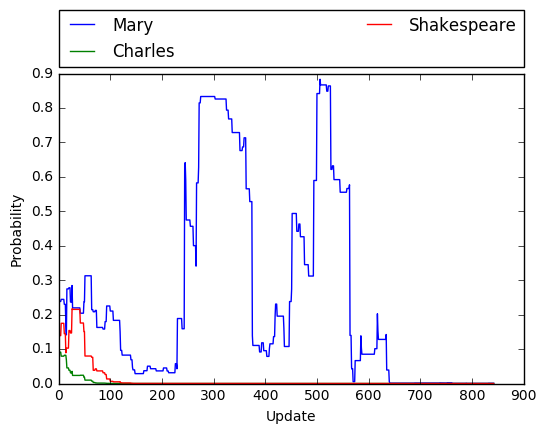

In [5]:
import matplotlib.pyplot as plt

#for i in (shakeV):
#    print(str(i) + ', ')
x = range(0, len(maryV))
plt.xlabel('Update')
plt.ylabel('Probability')
plt.plot(x, maryV, label='Mary')
plt.plot(x, charlesV, label='Charles')
plt.plot(x, shakeV, label='Shakespeare')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
plt.clf()
# for fuck, shit in zip(maryV, charlesV):
#     print(fuck, shit)
# authorId

In [ ]:
chainC = authorId.markovChains['Charles Dickens'][0]
countC = authorId.markovChains['Charles Dickens'][1]

chainM = authorId.markovChains['Mary Shelley'][0]
countM = authorId.markovChains['Mary Shelley'][1]

chainS = authorId.markovChains['Shakespeare'][0]
countS = authorId.markovChains['Shakespeare'][1]

print(chainS['when']['i'])

Questions:
    - What to do with words that aren't there?
    - "To" appears a lot more than other words. Should it be weighed differently?
    - Integrate sentence lengths